In [ ]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/train.csv",sep=",")

## Descripción básica del dataset

In [ ]:
df.head(5)

## Descripción filas y columnas

In [ ]:
# cuantas dimensiones y registros contiene
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

## Columnas, tipo de datos y nulos

In [ ]:
df.info()

## Descripción estadística de los datos numéricos

In [ ]:
df.describe()

### Visualizamos rápidamente las caraterísticas de entrada

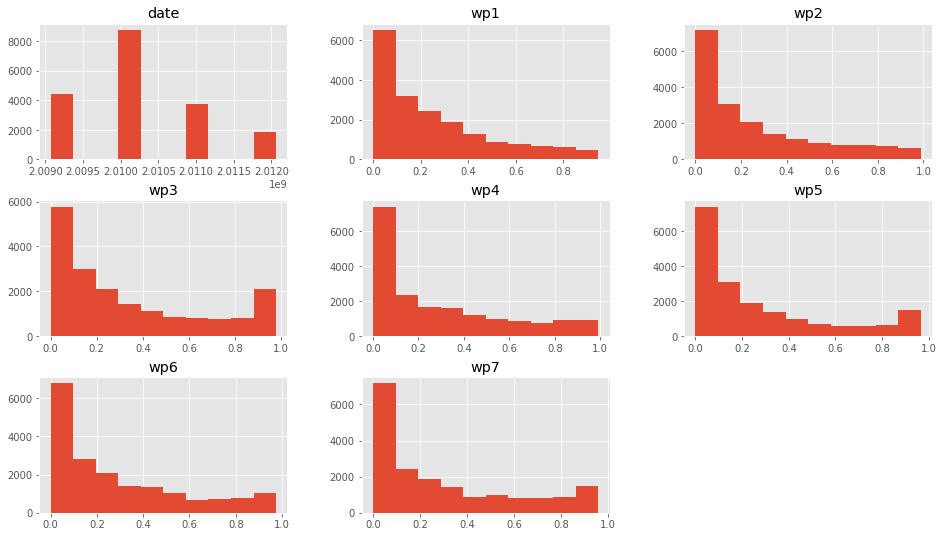

In [24]:

df.hist()
plt.show()

## Correlación entre variables

In [14]:
df.corr(method='pearson')

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
date,1.000000,0.107623,0.062304,0.084046,0.090365,0.103884,0.120338,0.071854
wp1,0.107623,1.000000,0.394313,0.608578,0.784888,0.581040,0.733620,0.723803
wp2,0.062304,0.394313,1.000000,0.394310,0.502267,0.237813,0.487426,0.512764
wp3,0.084046,0.608578,0.394310,1.000000,0.655927,0.425660,0.676722,0.703215
wp4,0.090365,0.784888,0.502267,0.655927,1.000000,0.526760,0.912731,0.881610
wp5,0.103884,0.581040,0.237813,0.425660,0.526760,1.000000,0.510836,0.490625
wp6,0.120338,0.733620,0.487426,0.676722,0.912731,0.510836,1.000000,0.927958
wp7,0.071854,0.723803,0.512764,0.703215,0.881610,0.490625,0.927958,1.000000


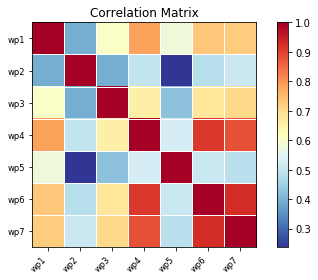

In [15]:
corr = df.set_index('date').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Text(0, 0.5, 'wp7')

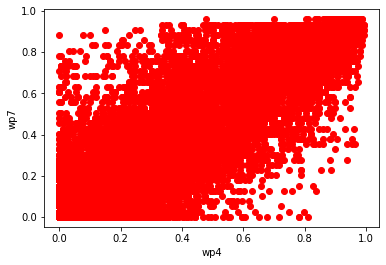

In [17]:
plt.plot(df.wp4, df.wp7, "ro")
plt.xlabel("wp4")
plt.ylabel("wp7")

## Outliers

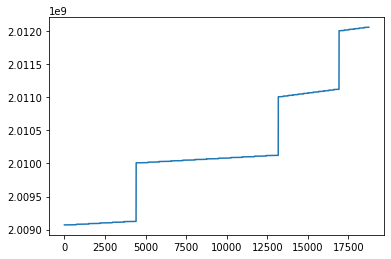

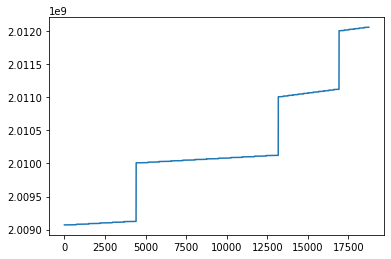

In [9]:
df.date.plot().get_figure()

In [25]:
def remov_outliers(y):
    #y = data['date']
    removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
    
    print(str(y[removed_outliers].size) + "/" + str(y.size) + " data points remain.") 
    print(removed_outliers.value_counts())
    
    return removed_outliers

In [27]:
removed_outliers = remov_outliers(df['date'])

#df[removed_outliers].plot().get_figure()

16881/18757 data points remain.
True     16881
False     1876
Name: date, dtype: int64


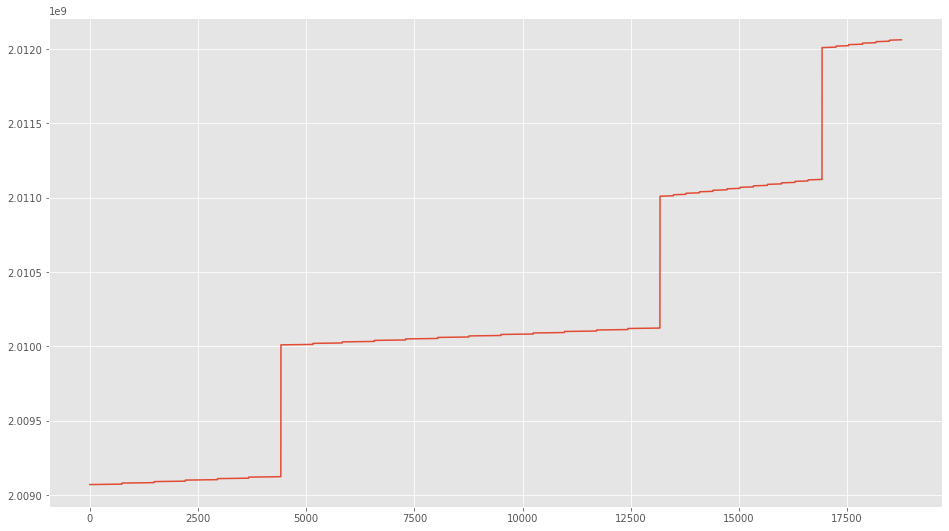

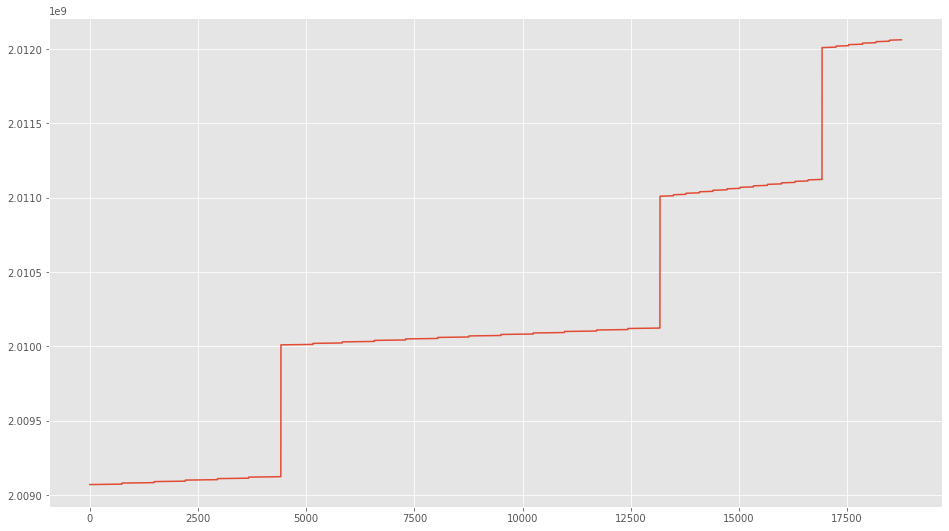

In [28]:
df.date.plot().get_figure()